# Basic classification: Classify images of clothing
This tutorial comes from the TensorFlow website: https://tensorflow.org/tutorials/kearas/classification

The aim here is to build and train a NN that classifies images of clothes.
## Import the relevant libraries

In [120]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [121]:
print(tf.__version__)

2.0.0


## Load the dataset

In [122]:
fashion_mnist = keras.datasets.fashion_mnist

In [123]:
type(fashion_mnist)

module

In [124]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Now that we've loaded the dataset and splitted into a train set and a test set, let's see what those dataset looks like and what kind of data they contain.

## Explore the datasets
what we can say from this quick exploration:
- image train_set contains 60000 images of 28*28 pixels. Looks like the value of each pixel can range from 0 to 255.
- label train_set is a numpy array that contains number from 0 to 10. Each number correspond to a type of clothes. the shape of the test set is.
- the test set has a (10000,) shape

In [125]:
type(train_image)

numpy.ndarray

In [126]:
train_image.shape

(60000, 28, 28)

In [127]:
test_image.shape

(10000, 28, 28)

In [128]:
type(train_labels)

numpy.ndarray

In [129]:
train_labels.shape

(60000,)

In [130]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [131]:
test_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Preprocess the data

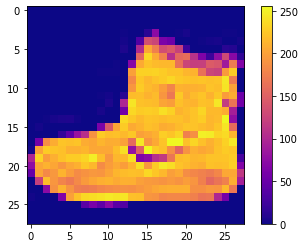

In [132]:
plt.figure()
plt.imshow(train_images[0], cmap='plasma')
plt.colorbar()
plt.grid(False)
plt.show()

This is a shoe. Clearly, pixels range from 0 to 255. We need to scale normalize the train_images before we feed it to the NN. This is a way to boost the training of our model. It is also import to apply the exact same transformation to the test_images array.

In [133]:
train_images, test_images = train_images/255.0, test_images/255.0

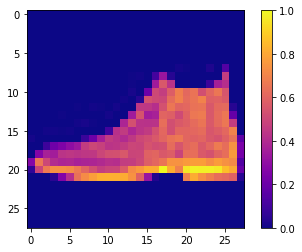

In [134]:
plt.figure()
plt.imshow(test_images[0], cmap='plasma')
plt.colorbar()
plt.grid(False)
plt.show()

We get the exact same shoe but with pixels ranging from 0 to 1.

Since class names are not included directly with the dataset, we need to store them in an array:


\begin{tabular}{ c c }
    Label & Class \\
    0 & T-shirt/top \\
    1 & Trouser \\
    2 & Pullover \\
\end{tabular}

In [135]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

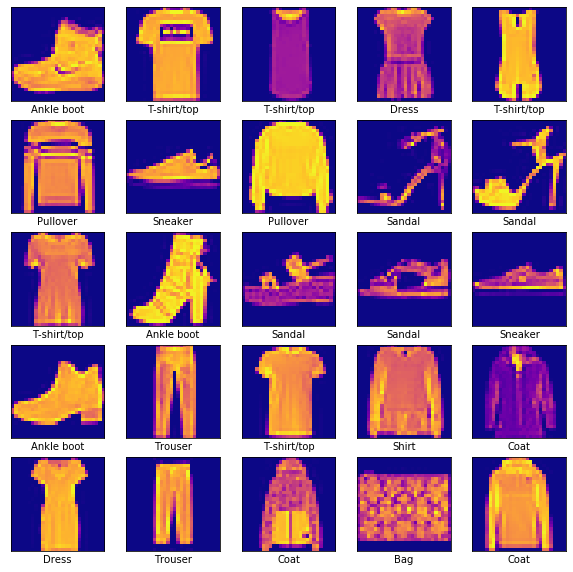

In [136]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='plasma')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model
Just like the mnist project, we will build here a Sequential model. This means that we will select and configure different kind of layers and put them one after another to create the NN. All these layers needs different bunches of parameters. Some will be explored here.

In [146]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Here we used two different layers:
- Flatten is meant to turn the (28,28) matrix into a one dimensional array consisting of 784 elements. This layer does not need any parameters. It's role is just to flatten the input data.
- Dense is a fully connected layer. The first one is composed of 128 neurones, the second 10. The role of the last layer is to return a logit score for each class of clothes.

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
- Loss function: That measures how accurate the model is during the training. By minimizing it, we steer the model in the right direction.
- optimizer: This is how the model is updated based on the data it sees and its loss function.
- metrics: This parameter will be usefull to monitor the training and testing steps. Here we will use the metric "accuracy".

In [150]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

## Training of the model
training the NN requieres 4 steps:
- feed the training data to the model. Here it is composed of the train_images and train_labels arrays.
- The model learns to associate images and labels better and better each time it sees the whole train set (epochs) thanks to the optimizer.
- Then we feed the test_set into the model and sees if it trains well.
- we make some modifications to make a better model if needed.

In [151]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2837 - accuracy: 0.8948
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2710 - accuracy: 0.9006
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2596 - accuracy: 0.9045
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2498 - accuracy: 0.9060
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2408 - accuracy: 0.9104
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2323 - accuracy: 0.9133
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2271 - accuracy: 0.9158
Epoch 8/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2175 - accuracy: 0.9178
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2135 - accuracy: 0.9199
Epoch 10/10
60

We can see that as the model trains, the loss and accuracy of the model are displayed. As the loss goes down, the accuracy goes up. However, the accuracy here is displayed for the train set. We need to evaluate our model on the test set now.

## Evaluate accuracy

In [152]:
model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 1s - loss: 0.2521 - accuracy: 0.8784


[0.35562593448758123, 0.8784]